In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
book_movie = pd.read_csv('book_movie_outliers_removed.csv')

In [64]:
book_movie.shape

(692, 10)

In [65]:
book_movie.dtypes

book_title               object
book_rating             float64
book_number_ratings     float64
book_year_published     float64
popularity              float64
release_date             object
movie_runtime           float64
movie_rating            float64
movie_number_ratings    float64
genres                   object
dtype: object

In [66]:
book_movie.describe().round(2)

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
count,692.00,692.00,692.00,692.00,692.00,692.00,692.00
mean,3.92,264583.51,1949.30,7.45,111.77,6.44,404.71
std,0.22,294329.80,63.66,5.63,26.26,0.90,528.53
min,3.08,209.00,1803.62,0.03,50.00,2.00,1.00
25%,3.80,34436.00,1920.25,2.48,95.00,5.90,20.00
50%,3.94,151602.00,1976.00,6.85,107.50,6.50,131.50
75%,4.07,403176.50,1998.00,10.76,125.00,7.00,635.75
max,4.56,956287.25,2018.00,23.17,200.00,10.00,1559.38


In [68]:
#book_movie['movie_popularity'] = book_movie['popularity']/book_movie['movie_number_ratings']
#book_movie['popularity'] = np.log(book_movie['popularity'])
book_movie['book_number_ratings'] = np.log(book_movie['book_number_ratings'])
book_movie['movie_number_ratings'] = np.log(book_movie['movie_number_ratings'])
book_movie['movie_runtime'] = np.log(book_movie['movie_runtime'])

To begin, visualize the data:

In [69]:
book_movie.corr()

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
book_rating,1.000000,0.328408,-0.013593,0.110312,0.001705,0.255455,0.075442
book_number_ratings,0.328408,1.000000,-0.219559,0.054008,0.101214,0.066355,0.013915
book_year_published,-0.013593,-0.219559,1.000000,0.354529,-0.013884,0.016369,0.436845
popularity,0.110312,0.054008,0.354529,1.000000,0.188932,0.311707,0.813041
movie_runtime,0.001705,0.101214,-0.013884,0.188932,1.000000,0.213430,0.184266
movie_rating,0.255455,0.066355,0.016369,0.311707,0.213430,1.000000,0.366704
movie_number_ratings,0.075442,0.013915,0.436845,0.813041,0.184266,0.366704,1.000000


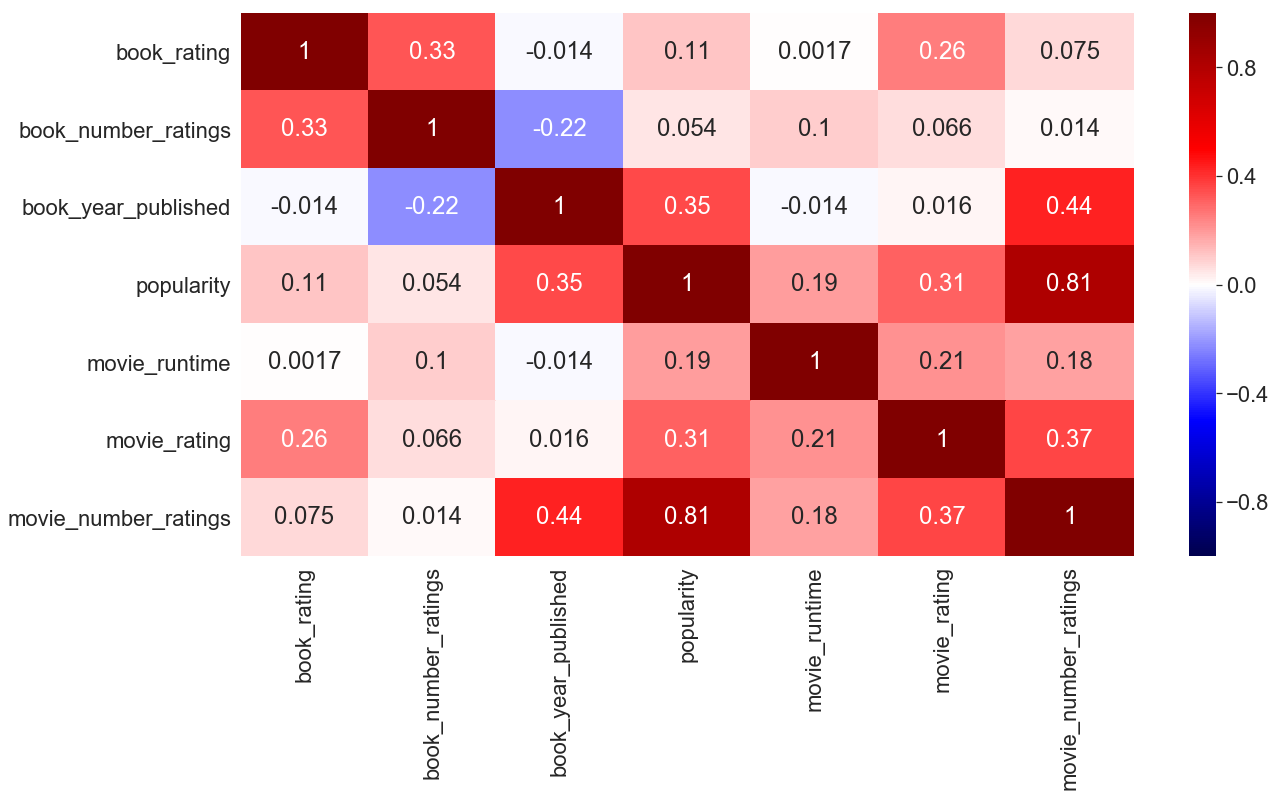

In [70]:
sns.set(font_scale=2) 
plt.figure(figsize=(20,10))
sns.heatmap(book_movie.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

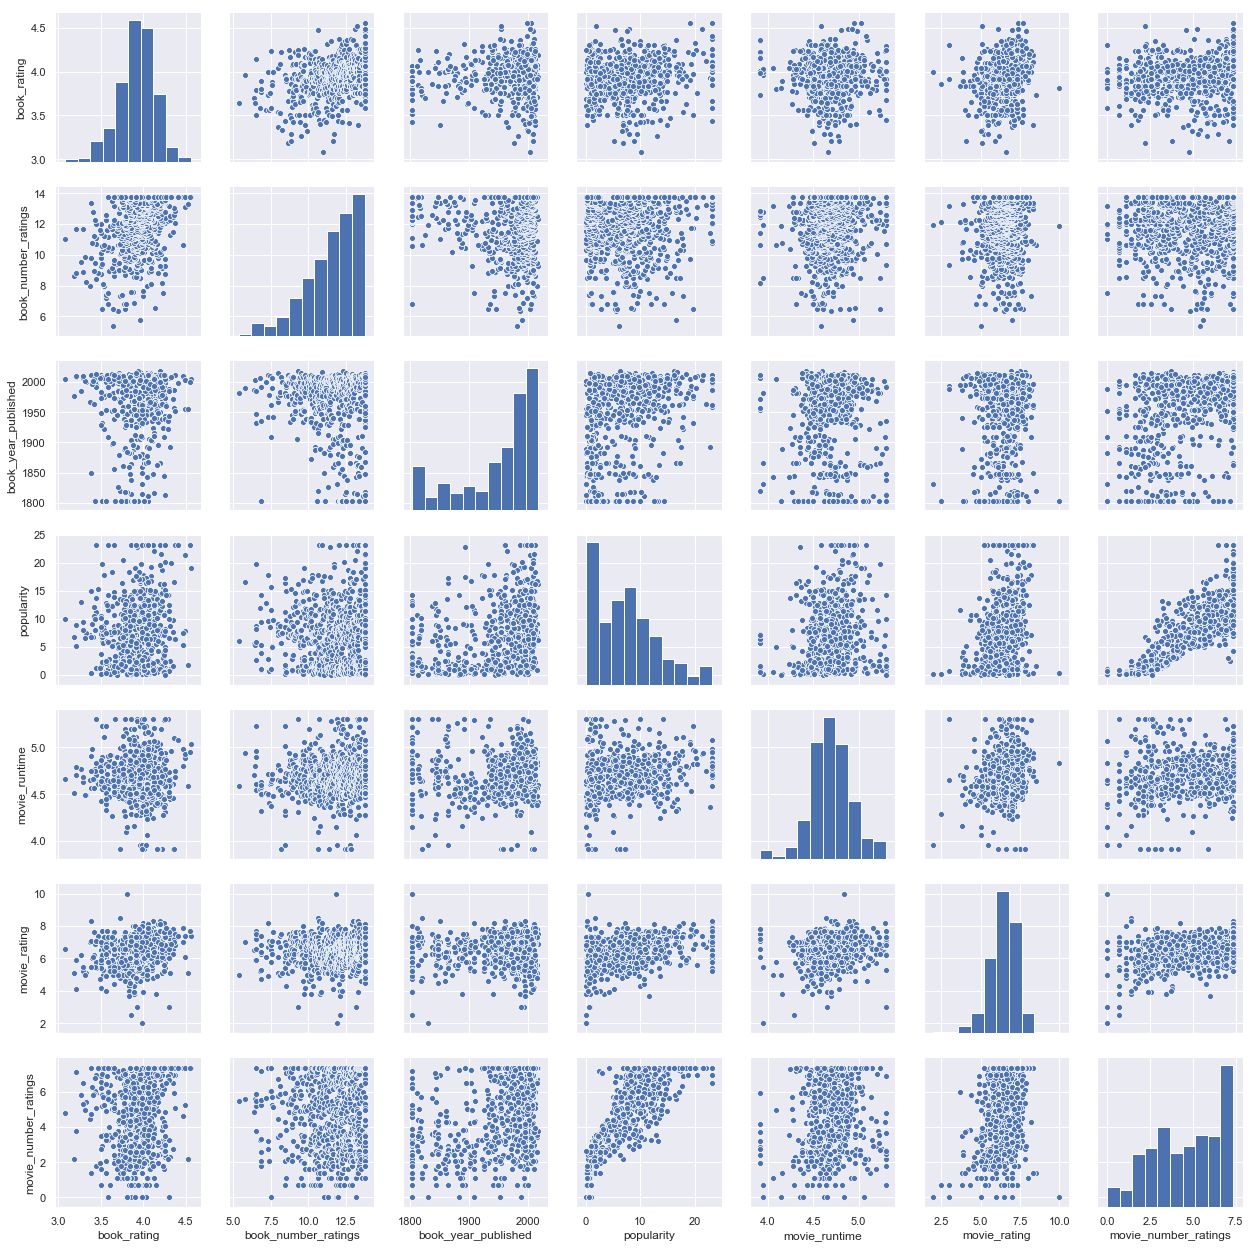

In [71]:
sns.set(font_scale=1) 
sns.pairplot(book_movie); #use log transformation for all the skewed features, using scaling for large-scale feature, standard scaler prefers normally distributed features.

In [72]:
# Create our feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     36.59
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           2.85e-33
Time:                        16:18:33   Log-Likelihood:                -828.89
No. Observations:                 692   AIC:                             1670.
Df Residuals:                     686   BIC:                             1697.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.8006      0.838     -0.955      0.340      -2.446       0.845
book_rating              0.9873      0.147      6.708      0.000       0.698       1.276
book_number_ratings     -0.0172      0.019     -0.921      0.358      -0.054       0.019
popularity              -0.0014      0.009     -0.154      0.878      -0.020       0.017
movie_runtime            0.6160      0.136      4.534      0.000       0.349       0.883
movie_number_ratings     0.1475      0.026      5.597      0.000       0.096       0.199
==============================================================================
Omnibus:                       49.031   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.091
Skew:                          -0.273   Prob(JB):                     1.27e-34
Kurtosis:                       5.262   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Define the model
lm1 = smf.ols('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     36.59
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           2.85e-33
Time:                        16:19:00   Log-Likelihood:                -828.89
No. Observations:                 692   AIC:                             1670.
Df Residuals:                     686   BIC:                             1697.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.8006      0.838     -0.955      0.340      -2.446       0.845
book_rating              0.9873      0.147      6.708      0.000       0.698       1.276
book_number_ratings     -0.0172      0.019     -0.921      0.358      -0.054       0.019
popularity              -0.0014      0.009     -0.154      0.878      -0.020       0.017
movie_runtime            0.6160      0.136      4.534      0.000       0.349       0.883
movie_number_ratings     0.1475      0.026      5.597      0.000       0.096       0.199
==============================================================================
Omnibus:                       49.031   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.091
Skew:                          -0.273   Prob(JB):                     1.27e-34
Kurtosis:                       5.262   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = LinearRegression()
lm.fit(X, y)

# Predict on the test data
X_test = test_data[['sqft_living']]
y_test = test_data.price
y_pred = lm.predict(X_test)

# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

Text(0, 0.5, 'Residuals')

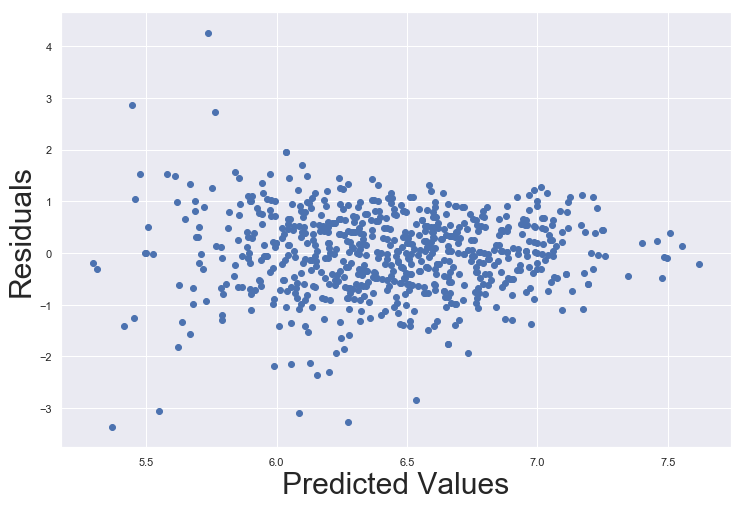

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.xlabel('Predicted Values', size = 30)
plt.ylabel('Residuals', size = 30)

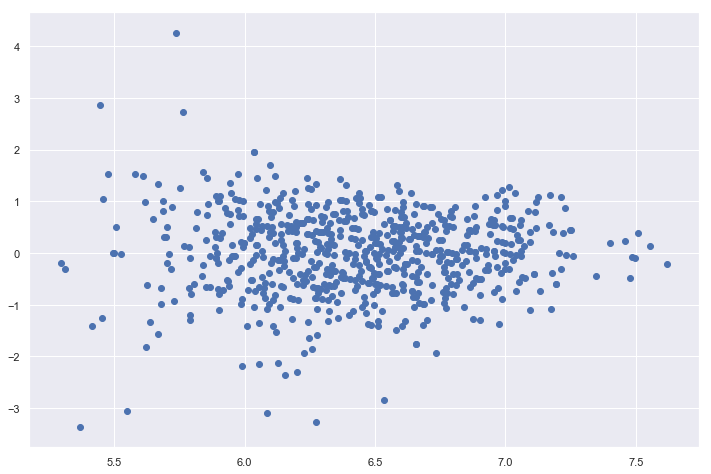

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [76]:
cols = ['book_rating', 'book_number_ratings','popularity','movie_runtime','movie_number_ratings']
X = book_movie[cols]
y = book_movie['movie_rating']

In [23]:
book_movie.to_pickle('book_movie_engineered_features.pkl')

# Assumption 1: regression is linear in parameters and correctly specified

Testing the first regression assumption:

In [77]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

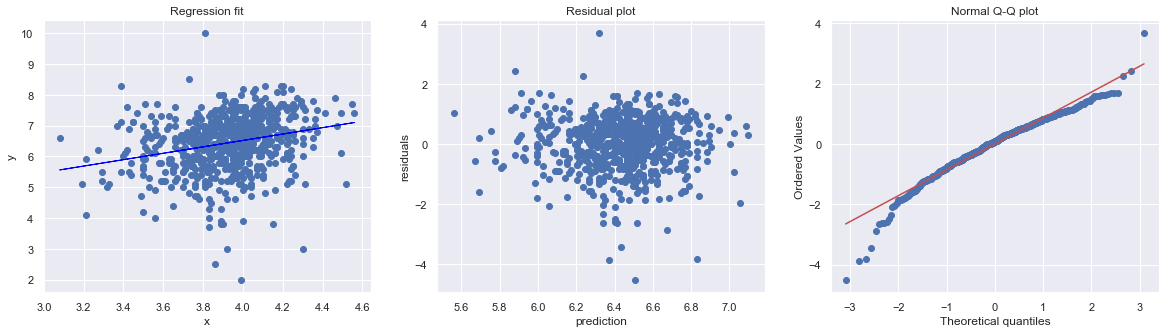

In [78]:
assumption1_x1 = np.array(book_movie['book_rating'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

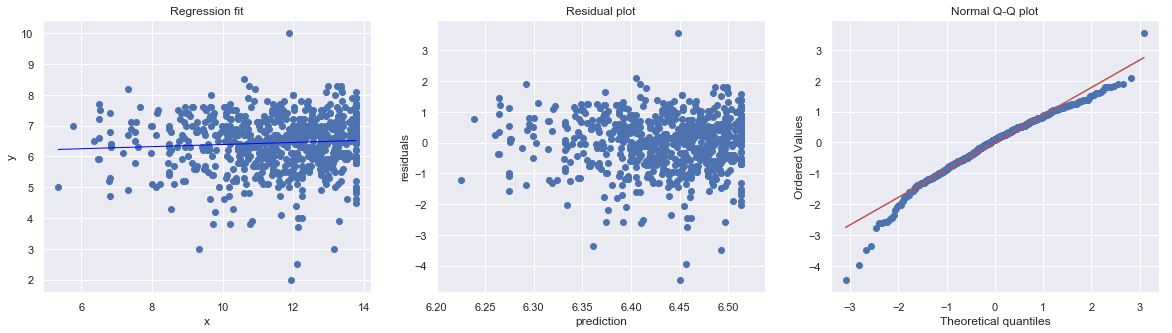

In [79]:
assumption1_x2 = np.array(book_movie['book_number_ratings'])
diagnostic_plot(assumption1_x2.reshape(-1,1), y)

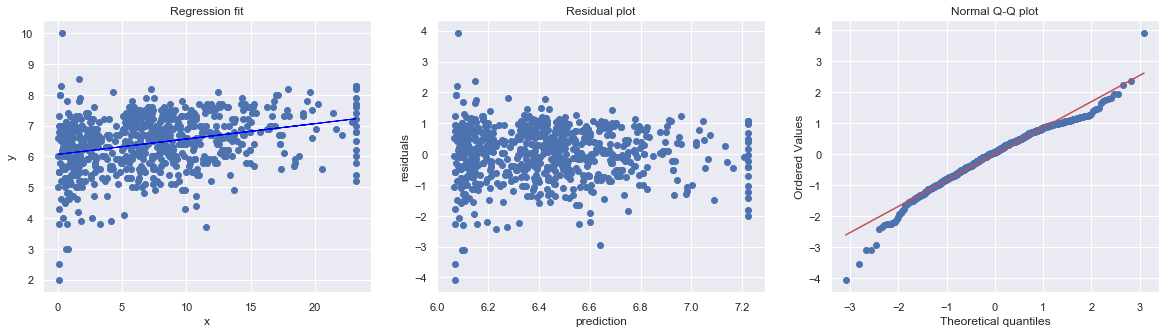

In [80]:
assumption1_x3 = np.array(book_movie['popularity'])
diagnostic_plot(assumption1_x3.reshape(-1,1), y)

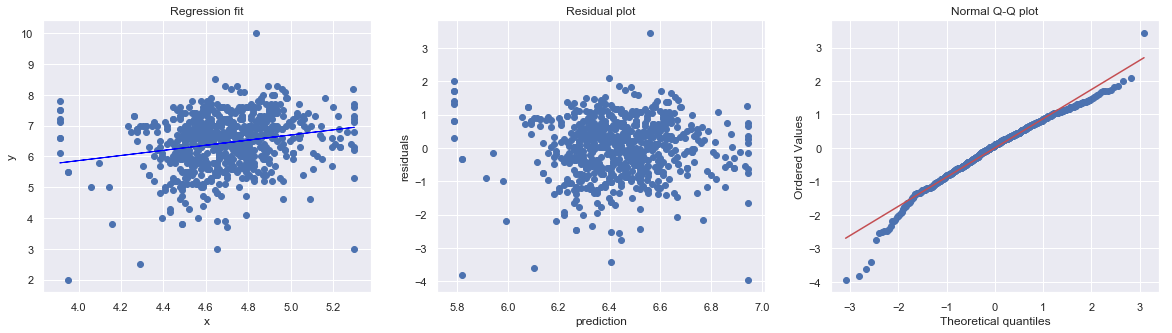

In [81]:
assumption1_x4 = np.array(book_movie['movie_runtime'])
diagnostic_plot(assumption1_x4.reshape(-1,1), y)

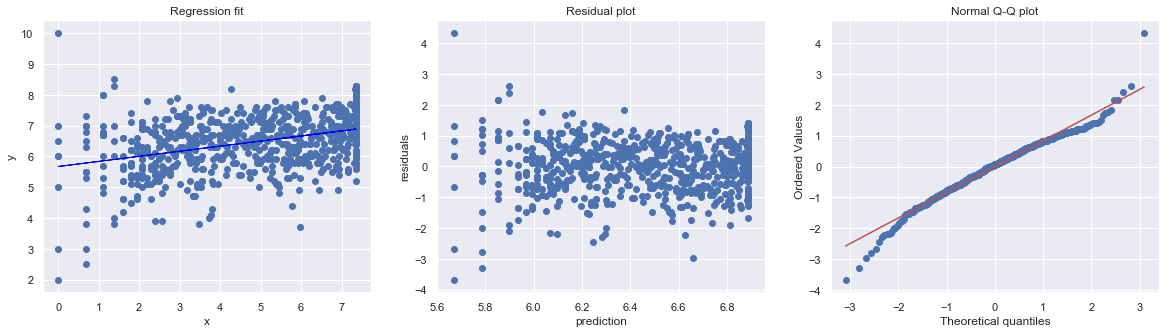

In [82]:
assumption1_x5 = np.array(book_movie['movie_number_ratings'])
diagnostic_plot(assumption1_x5.reshape(-1,1), y)

# Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean

In [83]:
# develop OLS with Sklearn
cols = ['book_rating', 'book_number_ratings','popularity','movie_runtime','movie_number_ratings']
assumption2_X = book_movie[cols]
assumption2_y = book_movie['movie_rating']
lr = LinearRegression()
fit = lr.fit(assumption2_X,assumption2_y) # for later use

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


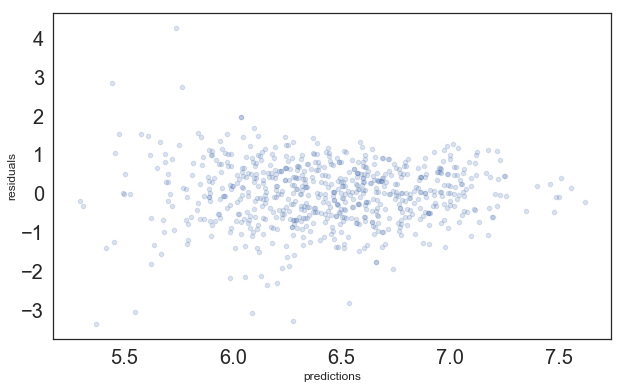

In [84]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

book_movie['predictions']=fit.predict(assumption2_X)
book_movie['residuals']=book_movie.movie_rating-book_movie.predictions
with sns.axes_style('white'):
    plot=book_movie.plot(kind='scatter',
                  x='predictions',y='residuals',alpha=0.2,figsize=(10,6), fontsize = 20)
#plt.xlabel('Predicted Values', size = 30)
#plt.ylabel('Residuals', size = 30)

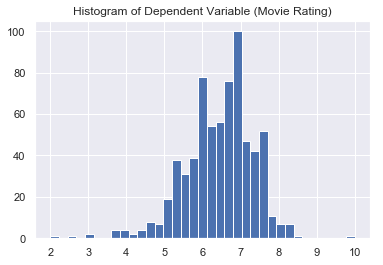

In [85]:
# inspect histogram
book_movie.movie_rating.hist(bins=35)
plt.title('Histogram of Dependent Variable (Movie Rating)');

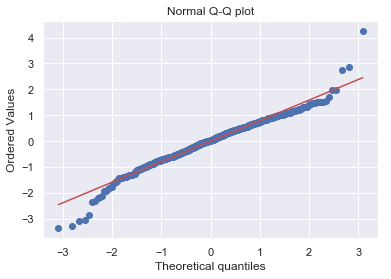

In [86]:
stats.probplot(book_movie['residuals'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Assumption 3: error terms must have constant variance

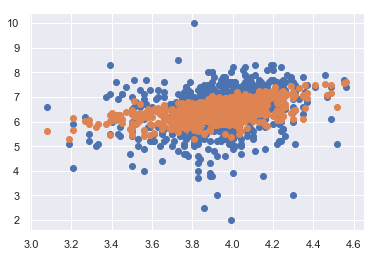

In [87]:
plt.scatter(book_movie.book_rating,y)
plt.scatter(book_movie.book_rating,book_movie.predictions);

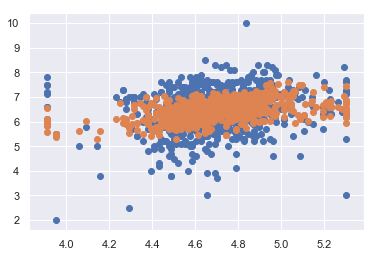

In [88]:
plt.scatter(book_movie.movie_runtime,y)
plt.scatter(book_movie.movie_runtime,book_movie.predictions);

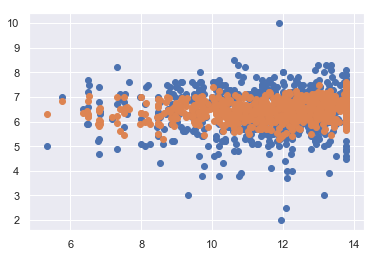

In [89]:
plt.scatter(book_movie.book_number_ratings,y)
plt.scatter(book_movie.book_number_ratings,book_movie.predictions);

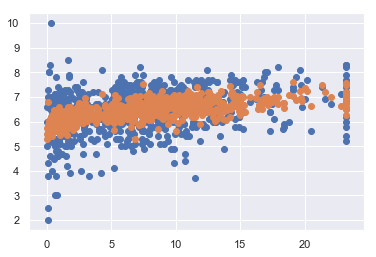

In [90]:
plt.scatter(book_movie.popularity,y)
plt.scatter(book_movie.popularity,book_movie.predictions);

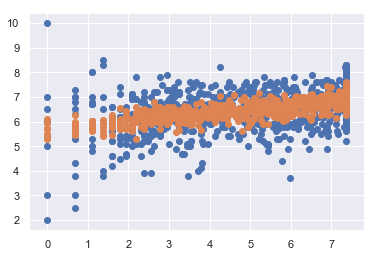

In [91]:
plt.scatter(book_movie.movie_number_ratings,y)
plt.scatter(book_movie.movie_number_ratings,book_movie.predictions);

Lambda: 2.0450495374440565


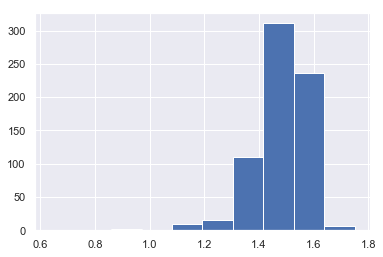

In [92]:
lamb=stats.boxcox_normmax(book_movie.movie_rating, brack=(-2, 2)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(book_movie.movie_rating,-0.25)-1)/-0.25

plt.hist(y_t);

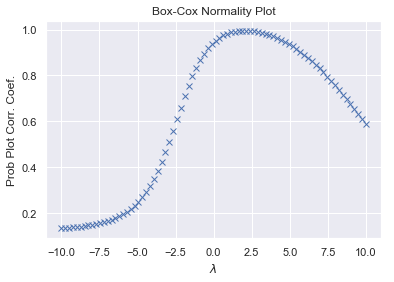

In [93]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(book_movie.movie_rating, -10, 10, plot=ax)

# Assumption 4: errors are uncorrelated across observations

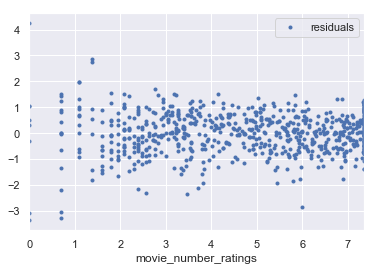

In [94]:
ts = book_movie[['movie_number_ratings','residuals']].set_index('movie_number_ratings')
ts.plot(style=".");

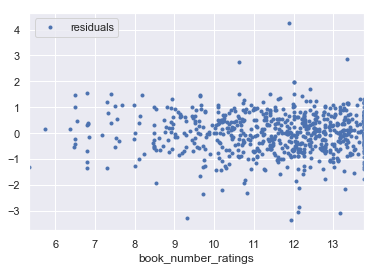

In [95]:
ts = book_movie[['book_number_ratings','residuals']].set_index('book_number_ratings')
ts.plot(style=".");

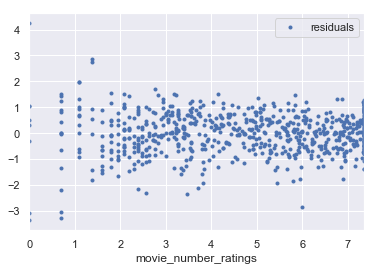

In [96]:
ts = book_movie[['movie_number_ratings','residuals']].set_index('movie_number_ratings')
ts.plot(style=".");

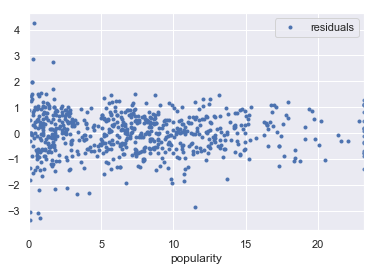

In [97]:
ts = book_movie[['popularity','residuals']].set_index('popularity')
ts.plot(style=".");

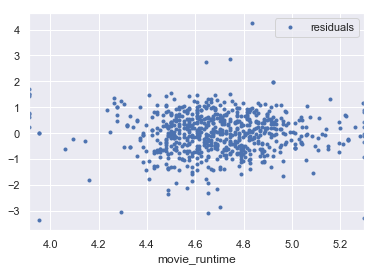

In [98]:
ts = book_movie[['movie_runtime','residuals']].set_index('movie_runtime')
ts.plot(style=".");

# Assumption 5: no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

Ways to diagnose: 
1. Inspect correlations of independent features
2. Keep an eye on condition number!
    3. As noted above, `statsmodels` will notify you of [large condition numbers](https://en.wikipedia.org/wiki/Condition_number).

Ways to fix:
3. Consider Partial Least Squares or projection into latent space (PCA, introduced in the second-half of the course)
4. Use Ridge regularization - do this for the model!

Incorporating [Ridge regularization](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) not only fixes this issue (if it exists, still safe to use if it doesn't), but it imparts other benefits as well. We'll use Ridge quite often after it's officially introduced!

In [176]:
#Going to continue Ridge regression in a new notebook for clarity purposes.